## Objective: : Increase the profit as the focus on optimal sales channel

## Understand the Data

We'll work with the FyntraCustomerData.csv. It has Customer info, such as Email, Address, and it also has numerical value columns:

* Avg_Session_Length: Average session of in-store style advice sessions.
* Time_on_App: Average time spent on App in minutes
* Time_on_Website: Average time spent on Website in minutes
* Length_of_Membership: How many years the customer has been a member. 
* Yearly_Amount_Spent: The output parameter -- Amount Spend in thousand $ in a year 


In [2]:
import numpy as np
import pandas as pd
customers = pd.read_csv("C:/Users/rjaip/Documents/Datasets/FyntraCustomerData.csv")

**Check the head of customers, and check out its info() and describe() methods to get some insights into data

customers.head()

In [3]:
customers.head()

,Email,Address,Avatar,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.describe()

,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg_Session_Length    500 non-null    float64
 4   Time_on_App           500 non-null    float64
 5   Time_on_Website       500 non-null    float64
 6   Length_of_Membership  500 non-null    float64
 7   Yearly_Amount_Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


** No missing data so you have a easy job at hand :-)

## Exploratory Data Analysis

**Let's explore the data! for better understanding**


**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. **

Analyzing the correlations between parameters

In [7]:
import seaborn as sns
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

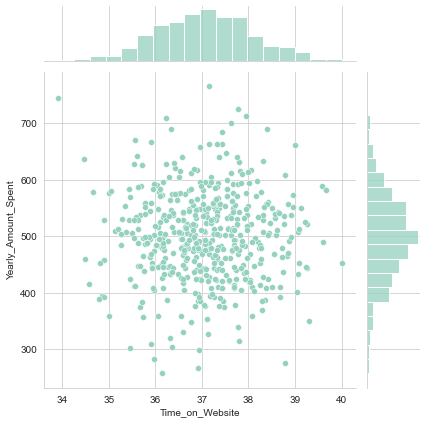

In [8]:
# More time on site, more money spent.
sns.jointplot(x='Time_on_Website',y='Yearly_Amount_Spent',data=customers)

** Do the same but with the Time on App column instead. **

**Finding the stronger correlation. 

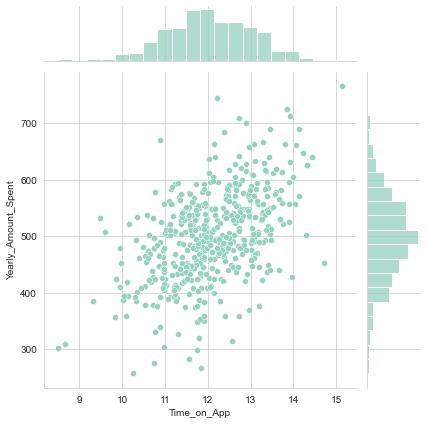

In [10]:
sns.jointplot(x='Time_on_App',y='Yearly_Amount_Spent',data=customers)
# This one looks stronger correlation than Time_on_Website

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.( Ignore the Colors for now)

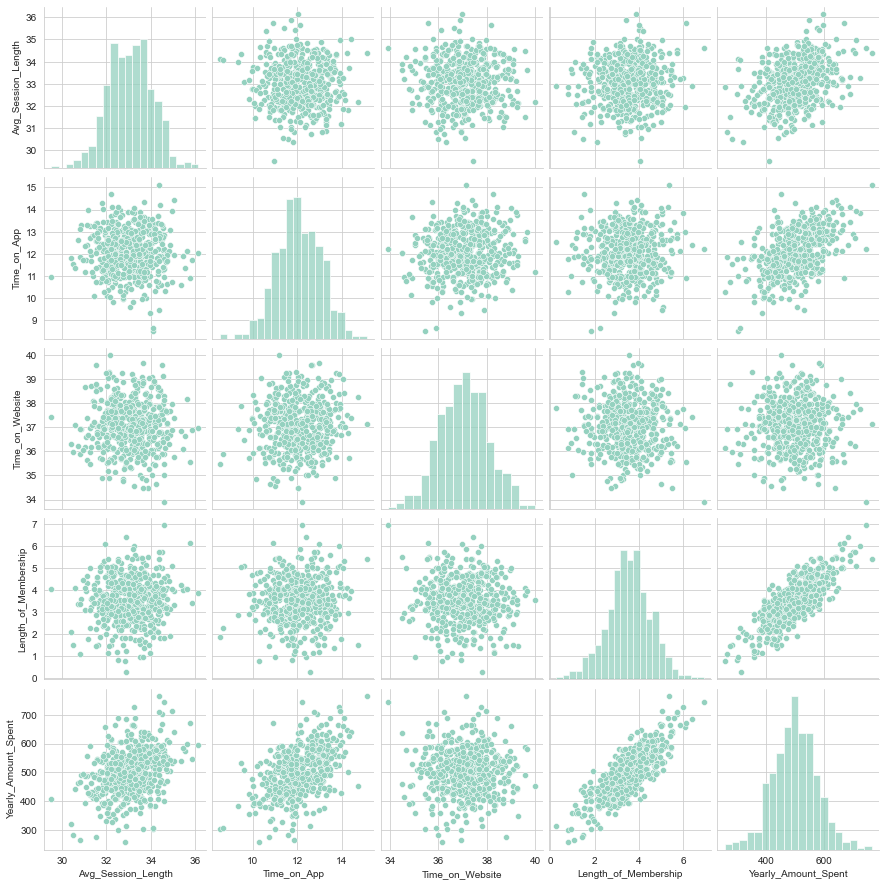

In [9]:
sns.pairplot(customers)

In [11]:
# Length of Membership 

** Fitting linear relationship **

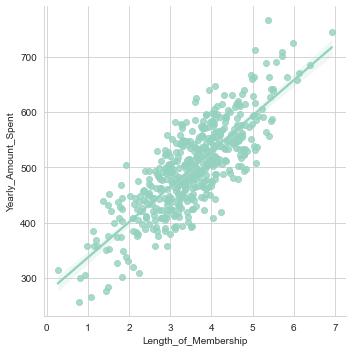

In [12]:
sns.lmplot(x='Length_of_Membership',y='Yearly_Amount_Spent',data=customers)

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** We set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly_Amount_Spent" column. **

In [13]:
y = customers['Yearly_Amount_Spent']

In [14]:
X = customers[['Avg_Session_Length', 'Time_on_App','Time_on_Website', 'Length_of_Membership']]

** We use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=85. test_size=0.3 means 30% of records are used for testing the model**

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=85)

## Training the Model

Now its time to train our model on our training data!

** Importing LinearRegression from sklearn.linear_model **

In [17]:
from sklearn.linear_model import LinearRegression

**Creating an instance of a LinearRegression() model named lm.**

In [18]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [19]:
lm.fit(X_train,y_train)

LinearRegression()

**Print out the coefficients of the model and will be in order of dimensions in X, X = customers[['Avg_Session_Length', 'Time_on_App','Time_on_Website', 'Length_of_Membership']]**

In [20]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [26.08163249 39.18778762  0.40460005 61.41777824]


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [21]:
predictions = lm.predict( X_test)

** Creating a scatterplot of the real test values versus the predicted values.
Ideally for each point value and x and y axis should be same**

Text(0, 0.5, 'Predicted Y')

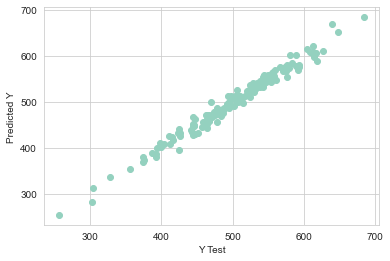

In [23]:
import matplotlib.pyplot as plt

plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares 

** Calculating the  Root Mean Squared Error**

In [24]:
# calculate these metrics by hand!
from sklearn import metrics

print('RMSE:', round( np.sqrt(metrics.mean_squared_error(y_test, predictions)),2) )

RMSE: 10.57


## Residuals

We have got a good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Ploting a histogram of the residuals and make sure it looks normally distributed. **

C:\Users\rjaip\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


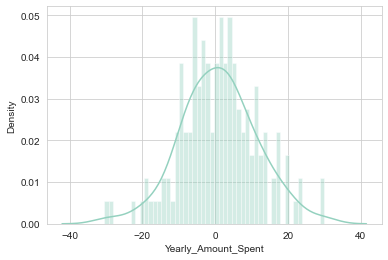

In [25]:
sns.distplot((y_test-predictions),bins=50);

## Final Question

** Q8. Based on coefficients interpret company should focus more on their mobile app or on their website**

In [26]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg_Session_Length,26.081632
Time_on_App,39.187788
Time_on_Website,0.404600
Length_of_Membership,61.417778


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 26.08 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 39.18 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.40 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.41 total dollars spent**.

## Conclusion:

### Clearly we can see that Time On App leads to higher revenue conversion – hence company should focus on App rather than website. Shutting the website or keep it depends solely on management take on revenue through website.
